In [23]:
import GamificationRL
from collections import defaultdict
import gymnasium as gym
from GamificationRL.envs.gamification_elements import *
import random
from itertools import permutations
from adaptive_agent import BasicAGAgent
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
plt.rcParams["figure.figsize"]=(10,7)

In [24]:
corr_g_e=list(corr_gamification_elements.values())
sample_g_e=list(sample_gamification_elements.values())
hexad=hexad_load_dict(pl=5,ach=4,ph=3,dis=2,s=1,fs=0.5).load_dict
fatigue_penalty=0.1
fatigue_replenishment=0.01
nothing_reward=50
env = gym.make('GamificationRL/GamificationPreferenceEnv-v0',
               hexad_load=hexad,
               gamification_elements=sample_g_e,
               use_fatigue=True,
               individual_modifications=None,
               repetition_penalty=(500,1000),
               nothing_reward=nothing_reward,
               fatigue_reduction=fatigue_penalty,
               fatigue_replenish=fatigue_replenishment
               )
obs,_=env.reset()

In [25]:
learn_rate=0.005
discount_factor=0.5
agent=BasicAGAgent(learn_rate=learn_rate,
                   discount_factor=discount_factor,
                   env=env)
training_iterations=int(1e6)
train_error=agent.train(env=env,iterations=training_iterations)

  1%|          | 6494/1000000 [00:00<00:32, 30665.95it/s]

100%|██████████| 1000000/1000000 [00:22<00:00, 45385.29it/s]


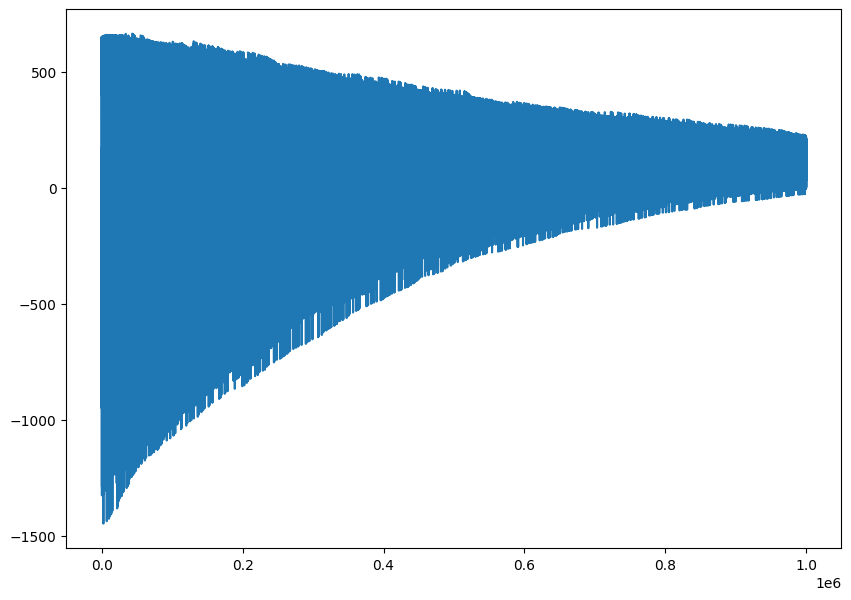

In [26]:
plt.plot(train_error)

In [27]:
test_iterations=2000
retrain_iterations=1000
training_learn_rate=0.2
r=[]
b=[]
actions=defaultdict(lambda:{'x':[],'y':[]})
ans=['accept','decline']
pick=np.random.randint(0,2,size=test_iterations)
obs,_=env.reset()
for i in tqdm(range(test_iterations)):
    rand=pick[i]
    action,reward,new_obs,info=agent\
        .step_and_update(env=env,
                         obs=obs,
                         answer=ans[rand],
                         retrain_iterations=retrain_iterations,
                         learning_rate=training_learn_rate)
    b.append((action,reward))
    r.append(reward)
    actions[action]['x'].append(i)
    actions[action]['y'].append(reward)
    obs=new_obs

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:36<00:00, 54.36it/s]


In [28]:
info

{'fatigue': {'Badges': 0.5900000000000006,
  'Leaderboard': 0.7600000000000007,
  'Levels': 0.18000000000000005,
  'Challenges': 0.5100000000000029,
  'Exploration': 1,
  'Easter Eggs': 0.3400000000000035,
  'Innovation Platform': 0.7200000000000033,
  'Development Tools': 0.8500000000000001,
  'Administrative Roles': 0.36000000000000026,
  'Gifting': 0.22000000000000183,
  'Social Discovery': 0.8700000000000003,
  'Competition': 0.5600000000000006,
  'Nothing': 1},
 'preference': {'pl': 0.5000000000000057,
  'ach': 1.3500000000000039,
  'ph': 1.1000000000000056,
  'dis': 0.9000004000000099,
  's': 1.2500005000000132,
  'fs': 1.0500006000000062}}

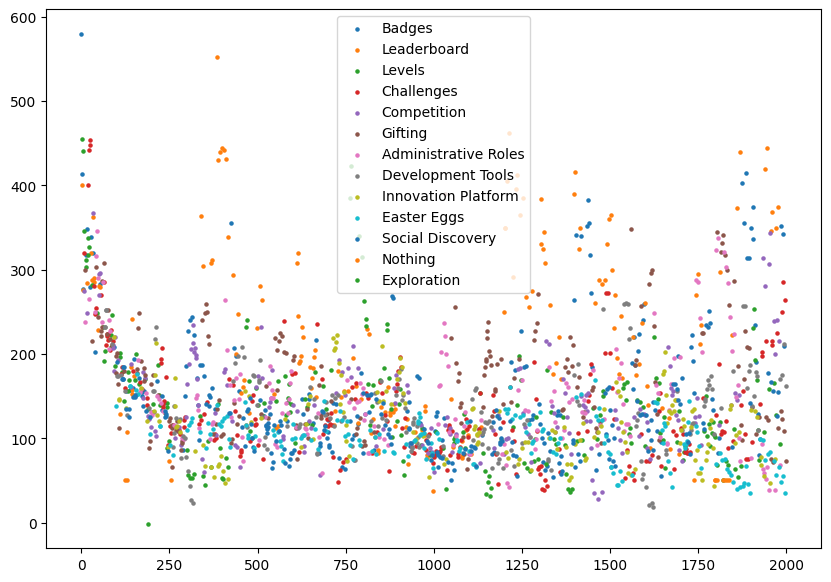

In [29]:
for i in actions:
    plt.scatter(actions[i]['x'],actions[i]['y'],label=env.action_to_ge[i],s=5)
ax=plt.gca()
ax.legend()


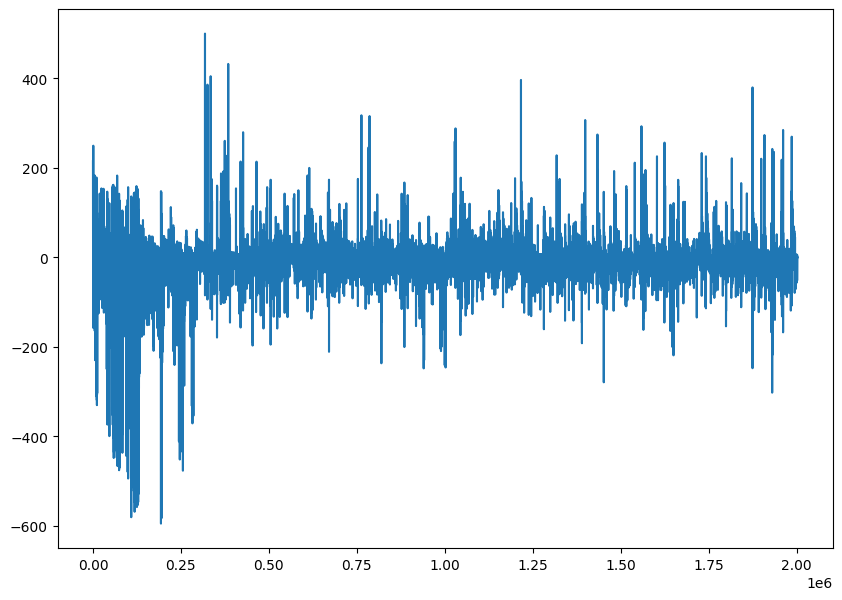

In [30]:
plt.plot(agent.error)

In [31]:
np.average(np.abs(agent.error)),\
np.std(np.abs(agent.error)),\
np.max((agent.error)),\
np.min((agent.error))

(2.78929004817889, 13.823460029223881, 500.4026128411583, -595.6876946374791)

In [32]:
np.average(np.abs(r)),\
np.std(np.abs(r)),\
np.max((r)),\
np.min((r))

(145.40594463816365, 74.92323290921925, 580.00007, -1.3499716499997416)

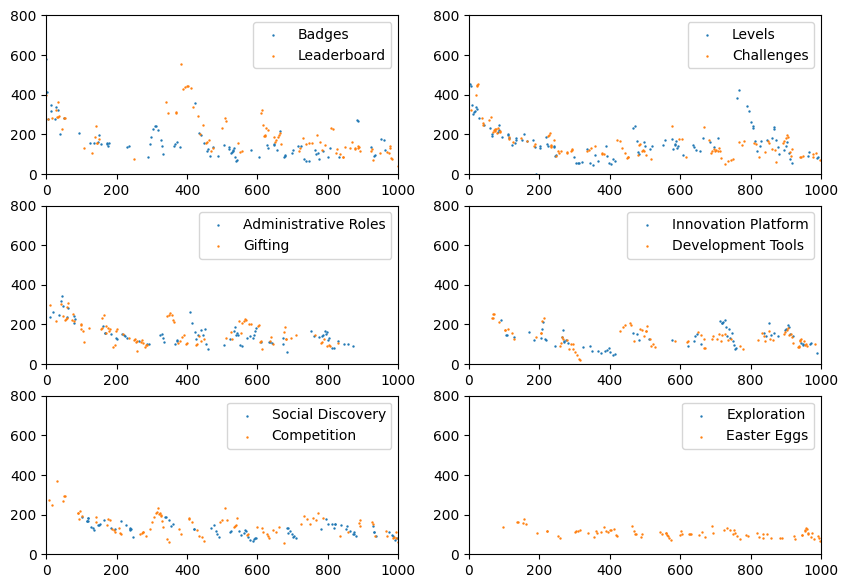

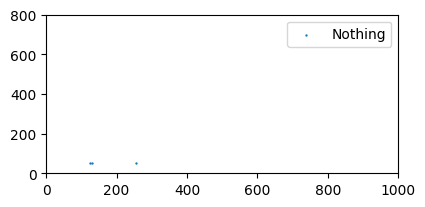

In [33]:
typ='pl'
j=1
plt.figure(1)
plt.subplot(3,2,j)
for i,_ in sorted(actions.items()):
    name=env.action_to_ge[i]
    hex_type=env.ge[name].type
    if hex_type!=None:
        plt.figure(1)
        type_index=hexad_types.index(env.ge[name].type)+1
    else:
        plt.figure(2)
    plt.subplot(3,2,type_index)
    plt.ylim(0,800)
    plt.xlim(0,1000)
    plt.scatter(actions[i]['x'],actions[i]['y'],label=name,s=0.5)
    ax=plt.gca()
    ax.legend()

In [34]:
np.average(r),np.std(r),np.max(r)

(145.40459466651365, 74.92585278495466, 580.00007)

In [35]:
print(hexad)
type_stats=defaultdict(lambda:0)
for i in actions:
    try:
        type_stats[sample_gamification_elements[env.action_to_ge[i]].type]+=len(actions[i]['x'])
    except KeyError:
        pass
for t in hexad:
    print(t,': ',hexad[t],', ',type_stats[t])


{'pl': 5.0, 'ach': 4.0, 'ph': 3.0, 'dis': 2.0, 's': 1.0, 'fs': 0.5}
pl :  5.0 ,  357
ach :  4.0 ,  425
ph :  3.0 ,  363
dis :  2.0 ,  336
s :  1.0 ,  325
fs :  0.5 ,  183


In [45]:
agent=BasicAGAgent(learn_rate=learn_rate,
                   discount_factor=discount_factor,
                   env=env)
training_iterations=int(1e6)
train_error=agent.train(env=env,iterations=training_iterations)

  0%|          | 2586/1000000 [00:00<00:38, 25604.00it/s]

100%|██████████| 1000000/1000000 [00:21<00:00, 46390.80it/s]


In [46]:
retrain_iterations=100
r=[]
b=[]
actions=defaultdict(lambda:{'x':[],'y':[]})
ans=['accept','decline']
obs,_=env.reset()
for i in tqdm(range(test_iterations)):
    rand=pick[i]
    action,reward,new_obs,info=agent\
        .step_and_update(env=env,
                         obs=obs,
                         answer=ans[rand],
                         retrain_iterations=retrain_iterations,
                         learning_rate=training_learn_rate)
    b.append((action,reward))
    r.append(reward)
    actions[action]['x'].append(i)
    actions[action]['y'].append(reward)
    obs=new_obs

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:04<00:00, 478.35it/s]


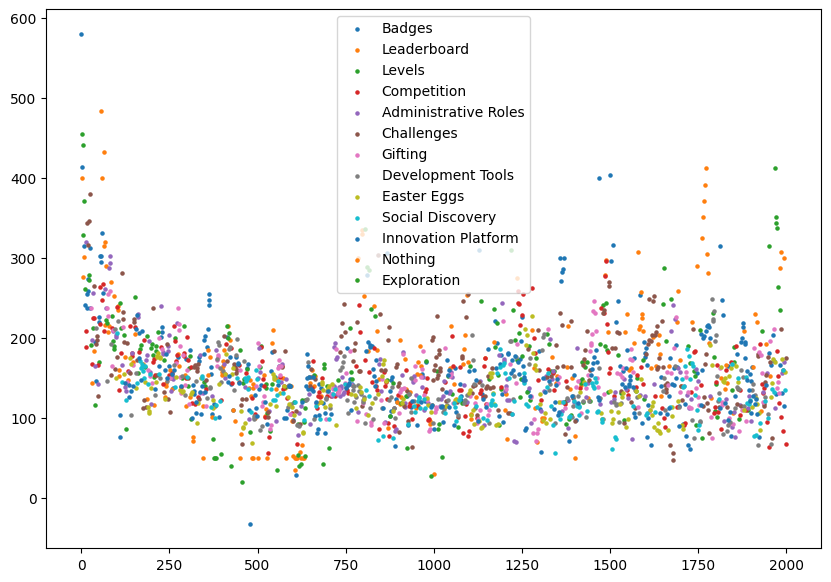

In [47]:
for i in actions:
    plt.scatter(actions[i]['x'],actions[i]['y'],label=env.action_to_ge[i],s=5)
ax=plt.gca()
ax.legend()


In [48]:
info

{'fatigue': {'Badges': 0.12,
  'Leaderboard': 0.350000000000006,
  'Levels': 0.3800000000000014,
  'Challenges': 0.3900000000000018,
  'Exploration': 1,
  'Easter Eggs': 0.7100000000000019,
  'Innovation Platform': 0.8100000000000024,
  'Development Tools': 0.7700000000000138,
  'Administrative Roles': 0.3900000000000192,
  'Gifting': 0.46000000000001906,
  'Social Discovery': 0.5800000000000014,
  'Competition': 0.15000000000000002,
  'Nothing': 1},
 'preference': {'pl': 1.350000000000005,
  'ach': 1.150000200000012,
  'ph': 0.9500003000000112,
  'dis': 0.9500000000000002,
  's': 1.1000000000000065,
  'fs': 0.6500006000000064}}

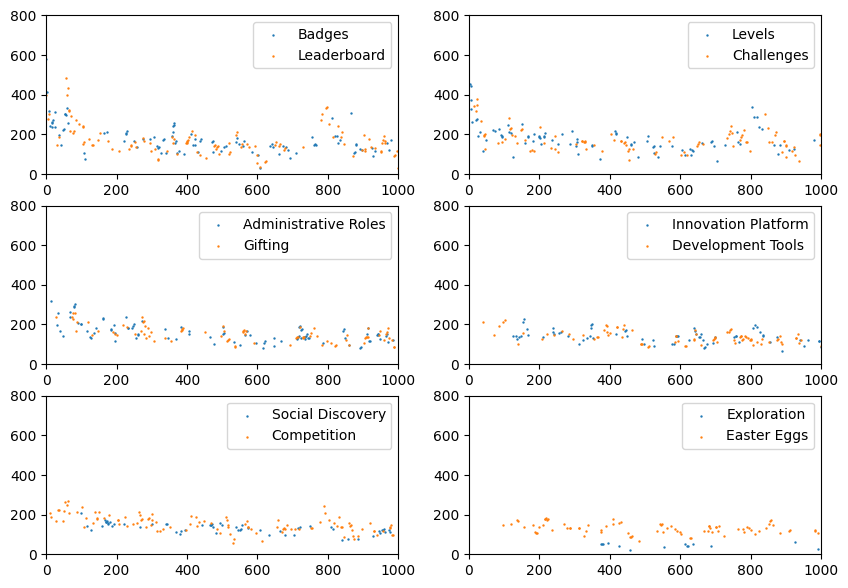

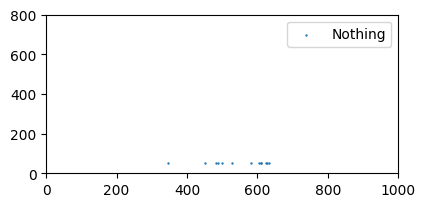

In [49]:
typ='pl'
j=1
plt.figure(1)
plt.subplot(3,2,j)
for i,_ in sorted(actions.items()):
    name=env.action_to_ge[i]
    hex_type=env.ge[name].type
    if hex_type!=None:
        plt.figure(1)
        type_index=hexad_types.index(env.ge[name].type)+1
    else:
        plt.figure(2)
    plt.subplot(3,2,type_index)
    plt.ylim(0,800)
    plt.xlim(0,1000)
    plt.scatter(actions[i]['x'],actions[i]['y'],label=name,s=0.5)
    ax=plt.gca()
    ax.legend()

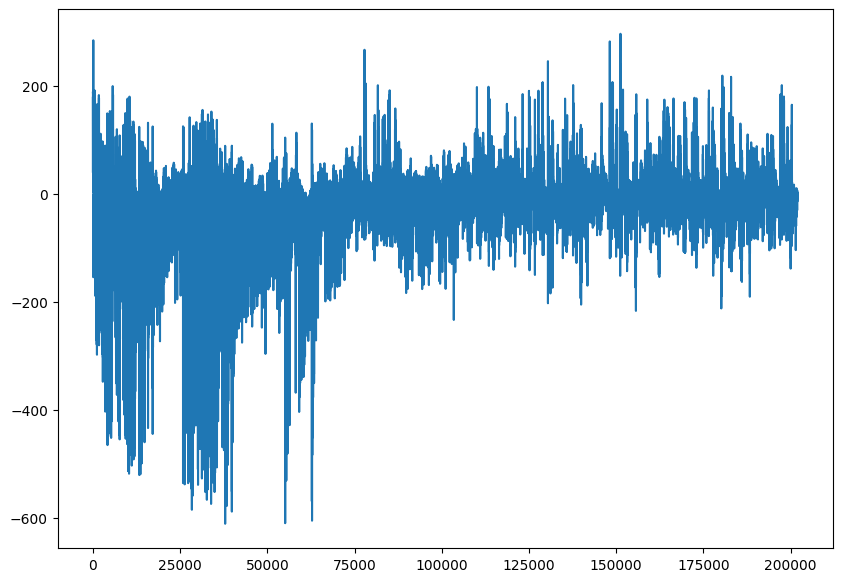

In [50]:
plt.plot(agent.error)

In [51]:
np.average(np.abs(agent.error)),\
np.std(np.abs(agent.error)),\
np.max((agent.error)),\
np.min((agent.error))

(21.272496728269648, 39.016774368149555, 296.5030844306236, -611.4930756347036)

In [52]:
np.average((r)),\
np.std((r)),\
np.max((r)),\
np.min((r))

(152.59906616242705, 56.181361165203256, 580.00007, -31.999977599999557)

In [53]:
print(hexad)
type_stats=defaultdict(lambda:0)
for i in actions:
    try:
        type_stats[sample_gamification_elements[env.action_to_ge[i]].type]+=len(actions[i]['x'])
    except KeyError:
        pass
for t in hexad:
    print(t,': ',hexad[t],', ',type_stats[t])


{'pl': 5.0, 'ach': 4.0, 'ph': 3.0, 'dis': 2.0, 's': 1.0, 'fs': 0.5}
pl :  5.0 ,  393
ach :  4.0 ,  387
ph :  3.0 ,  349
dis :  2.0 ,  329
s :  1.0 ,  346
fs :  0.5 ,  182
